# **California Manufacturing Company:**



Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The CALIFORNIA MANUFACTURING COMPANY is considering expansion by building a new factory in either Los Angeles or San Francisco, or perhaps even in both cities. It also is considering building at most one new warehouse, but the choice of location is restricted to a city where a new factory is being built. The net present value (total profitability considering the time value of money) of each of these alternatives is shown in the fourth column of Table 12.1. The rightmost column gives the capital required (already included in the net present value) for the respective investments, where the total capital available is $10 million. The objective is to find the feasible combination of alternatives that maximizes the total net present value.

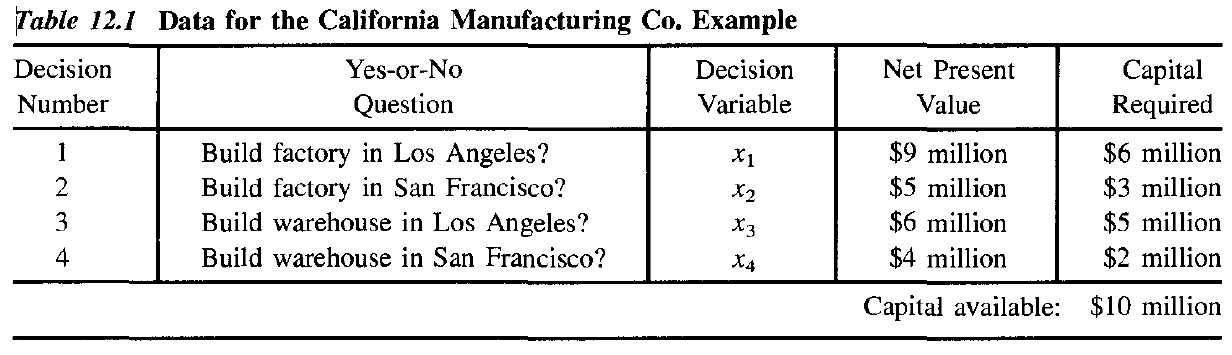

**Modeling:**

$x_{1},x_{2} \ $   binary variables for factories

$x_{3},x_{4} \ $   binary variables for warehouses

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 9x_{1}+5x_{2}+6x_{3}+4x_{4}$

$\\ $

$Constraints:\\ $

$6x_{1}+3x_{2}+5x_{3}+2x_{4} \leq 10$

$x_{3}+x_{4} \leq 1$

$x_{3} \leq x_{1}$

$x_{4} \leq x_{2}$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 58.0 MB/s eta 0:00:00


In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in [1,2,3,4]), cat='Binary')

In [3]:
x

{1: x_1, 2: x_2, 3: x_3, 4: x_4}

In [4]:
#Defining Objective Function

model = LpProblem('model', LpMaximize)

model += 9*x[1]+5*x[2]+6*x[3]+4*x[4]

In [5]:
#Constraints

model += 6*x[1]+3*x[2]+5*x[3]+2*x[4] <= 10
model += x[3]+x[4] <=1
model += x[3] <= x[1]
model += x[4] <= x[2]

In [6]:
#Model summary

model

model:
MAXIMIZE
9*x_1 + 5*x_2 + 6*x_3 + 4*x_4 + 0
SUBJECT TO
_C1: 6 x_1 + 3 x_2 + 5 x_3 + 2 x_4 <= 10

_C2: x_3 + x_4 <= 1

_C3: - x_1 + x_3 <= 0

_C4: - x_2 + x_4 <= 0

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer

In [7]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 14.0


In [8]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:1.0
x_2:1.0
x_3:0.0
x_4:0.0


In [9]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,1.0
2,x_2,1.0
3,x_3,0.0
4,x_4,0.0


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [11]:
model = ConcreteModel()

model.indices = Set(initialize=[1,2,3,4])
model.x = Var(model.indices, domain=Binary)

model.obj = Objective(expr=9*model.x[1]+5*model.x[2]+6*model.x[3]+4*model.x[4], sense=maximize)

model.constraint1 = Constraint(expr=6*model.x[1]+3*model.x[2]+5*model.x[3]+2*model.x[4] <= 10)
model.constraint2 = Constraint(expr=model.x[3]+model.x[4] <=1)
model.constraint3 = Constraint(expr=model.x[3] <= model.x[1])
model.constraint4 = Constraint(expr=model.x[4] <= model.x[2])

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=4, Index=indices
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  14.0

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  9.0 :  10.0
    constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  0.0 :   1.0
    constraint3 : Size=1
        Key  : Lower : Body : Upper
        None :  None : -1.0 :   0.0
    constraint4 : Size=1
        Key  : Lower : Body : Upper
        None :  None : -1.0 :   0.0


In [12]:
print("Variable values:")
model.x.pprint()

Variable values:
x : Size=4, Index=indices
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   1.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : False : False : Binary
